In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, precision_recall_curve



In [2]:
data1 = pd.read_csv("train.csv")
data2 = pd.read_csv('test.csv')

dataset = pd.concat([data1,data2], ignore_index=True)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# One hot encoding 
dataset['y'] = dataset['y'].str.replace('"', '').str.strip()
dataset.loc[dataset['y'] == 'yes', 'outcome_num'] = 1 
dataset.loc[dataset['y'] == 'no', 'outcome_num'] = 0

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          49732 non-null  int64  
 1   job          49732 non-null  object 
 2   marital      49732 non-null  object 
 3   education    49732 non-null  object 
 4   default      49732 non-null  object 
 5   balance      49732 non-null  int64  
 6   housing      49732 non-null  object 
 7   loan         49732 non-null  object 
 8   contact      49732 non-null  object 
 9   day          49732 non-null  int64  
 10  month        49732 non-null  object 
 11  duration     49732 non-null  int64  
 12  campaign     49732 non-null  int64  
 13  pdays        49732 non-null  int64  
 14  previous     49732 non-null  int64  
 15  poutcome     49732 non-null  object 
 16  y            49732 non-null  object 
 17  outcome_num  49732 non-null  float64
dtypes: float64(1), int64(7), object(10)
memory usa

In [5]:
dataset['age'] = dataset['age'].astype(float)
dataset['balance'] = dataset['balance'].astype(float)

In [6]:
dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outcome_num
49727,33.0,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0.0
49728,57.0,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0.0
49729,57.0,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0.0
49730,28.0,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211,3,other,no,0.0
49731,44.0,entrepreneur,single,tertiary,no,1136.0,yes,yes,cellular,3,apr,345,2,249,7,other,no,0.0


In [7]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous,outcome_num
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892,0.116826
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838,0.321216
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset[["age", "balance"]])

In [9]:
print(dataset['y'].value_counts())

y
no     43922
yes     5810
Name: count, dtype: int64


### Because the number of "No" outcome in the training set is significantly higher than that of "yes" outome, I choose to use SMOTE, a technique that generates synthetic samples for the minority class to balance the dataset to improve model performance on imbalanced classification tasks.

In [10]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset['outcome_num'] , test_size = 0.2, random_state = 1)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
outcome_num
0.0    35114
1.0     4671
Name: count, dtype: int64

After SMOTE:
outcome_num
0.0    35114
1.0    35114
Name: count, dtype: int64


In [11]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
print("The score of this model is:", model.score(X_test, y_test))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

The score of this model is: 0.6502463054187192
Intercept: [-0.00879748]
Coefficients: [[0.05647826 0.14730759]]


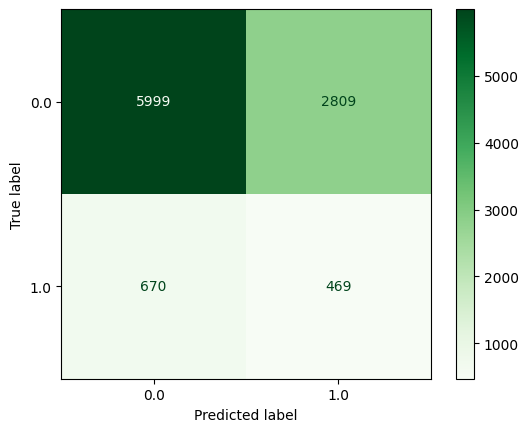

In [13]:
y_prediction = model.predict(X_test)
cm = confusion_matrix(y_test, y_prediction, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
disp.plot(cmap = 'Greens')
plt.show()

In [15]:
precision = precision_score(y_test, y_prediction, pos_label=1)
recall = recall_score(y_test, y_prediction, pos_label=1)
f1 = f1_score(y_test, y_prediction, pos_label=1)

print("Precision:", precision)
print("Recall:   ", recall)
print("F1-score: ", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_prediction, digits=3))


Precision: 0.14307504575960953
Recall:    0.4117647058823529
F1-score:  0.21236133122028525

Classification Report:
              precision    recall  f1-score   support

         0.0      0.900     0.681     0.775      8808
         1.0      0.143     0.412     0.212      1139

    accuracy                          0.650      9947
   macro avg      0.521     0.546     0.494      9947
weighted avg      0.813     0.650     0.711      9947



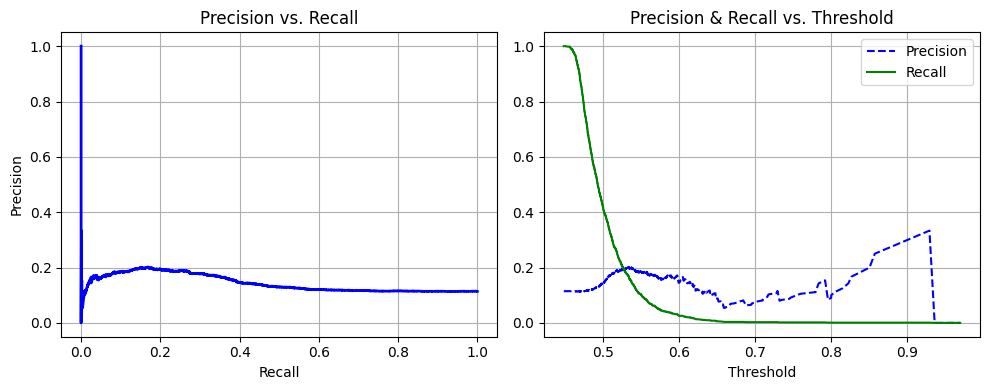

In [17]:
y_proba = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 4))

# Left plot: Precision-Recall curve
plt.subplot(1, 2, 1)
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.title("Precision vs. Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# (B) Precision / Recall vs. Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-",  label="Recall")
plt.title("Precision & Recall vs. Threshold")
plt.xlabel("Threshold")
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

### The model achieves an accuracy of approximately 65% on the test set, a > 20% drop in accuracy compared to before applying the SMOTE technique

### However, this is expected and acceptable because the model before SMOTE simply predicts "No" to all cases. But because the test set has a majority of "No" cases, so that model's accuracy turned out to be high. But the model did not actually "learn" to predict correctly and might fail in real-life cases.

### Note that both precision and recall are improved compared to the model in the other jupiter notebook in which I did not use SMOTE